<img src="Figs/GEOS_logo.pdf" width="500"/>

# <font color=blue>"make_fake_GPS_raw_for_BC.ipynb"</font>
#### Dec 08, 2021  <font color=red>(v. testing)</font> 
##### Jeonghyeop Kim (jeonghyeop.kim@gmail.com)
> input files: **`ref_GNSS.dat`** & **`map_config.txt`** \
> output file: **`GPS_raw_fake_BC.dat`** 

0. This code is a part of the joint inversion project (project4: joint inversion of GNSS and InSAR)
1. This code generates **`GPS_raw_fake_BC.dat`** file that will be used to obtain latlong_gps.dat
2. The latlong_gps.dat will be copied as output.dat 
3. Sparse code will generate UCERF ref. velocity at the boundary as well as at the InSAR reference point. 
4. A velocity vector at the InSAR reference can be removed. Thus the B.C. data is in the same reference point as the InSAR data. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Define reference point
ref_file="ref_GNSS.dat"
df_ref = pd.read_csv(ref_file, header=None, sep = ' ')
ref_lon = df_ref.iloc[0,0]
ref_lat = df_ref.iloc[0,1]

In [3]:
# output file name
output = 'GPS_raw_fake_BC.dat'

In [4]:
# Boundary longitude, latitude

conf_file="map_config.txt" 
#lon min
#lon max
#lat min
#lat max
#steps

conf=np.loadtxt(conf_file, dtype="float")

lon_min=float(conf[0])
lon_max=float(conf[1])
lat_min=float(conf[2])
lat_max=float(conf[3])

# Data sampling step on the boundary
step = float(conf[4])  #in degree

In [5]:
lon_range=np.arange(lon_min,lon_max,step)
lon_range=np.append(lon_range, lon_max)
lat_range=np.arange(lat_min,lat_max,step)
lat_range=lat_range[1:]

In [6]:
lon_max_for_lat_range=np.array(lon_max*np.ones(len(lat_range)))
lon_min_for_lat_range=np.array(lon_min*np.ones(len(lat_range)))

lat_max_for_lon_range=np.array(lat_max*np.ones(len(lon_range)))
lat_min_for_lon_range=np.array(lat_min*np.ones(len(lon_range)))

In [7]:
lon_fi=np.concatenate((lon_range, lon_max_for_lat_range, lon_min_for_lat_range,lon_range))
lat_fi=np.concatenate((lat_min_for_lon_range, lat_range, lat_range, lat_max_for_lon_range))
#Merge all np arrays

lon_fi=lon_fi.tolist()
lat_fi=lat_fi.tolist()


coor_dict = {'lon' : lon_fi, 'lat' : lat_fi}

df=pd.DataFrame.from_dict(coor_dict)

In [8]:
df=df.round(3)
df=df.sort_values(by=['lat', 'lon'])

In [9]:
df_ref = pd.DataFrame({'lon': [ref_lon], 'lat' : [ref_lat]})
#make a new df for the reference point

df_fi = pd.concat([df_ref, df], ignore_index = True, axis = 0)

In [10]:
df_fi['vx fake']=np.ones(len(df_fi))*-17
df_fi['vy fake']=np.ones(len(df_fi))*15
df_fi['sx fake']=np.ones(len(df_fi))*0.111
df_fi['sy fake']=np.ones(len(df_fi))*0.111
df_fi['coxy fake']=np.ones(len(df_fi))*0.05

year = np.ones(len(df_fi))*2020
year = year.astype(int)

flag = np.ones(len(df_fi))*1
flag = flag.astype(int)

df_fi['year']=year
df_fi['flag']=flag

In [11]:
df_fi.to_csv(output, index=False, sep=' ',float_format='%.4f')

In [12]:
df_fi.lon.values
df_fi.lat.values
import matplotlib.pyplot as plt

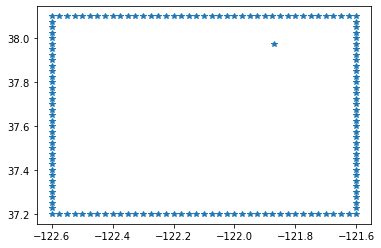

In [13]:
plt.plot(df_fi.lon.values,df_fi.lat.values,'*')
plt.savefig('boundary_points.pdf')